In [1]:

import torch
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from load_LIDC_crops import LIDC_CROPS
from load_LIDC_data import LIDC_IDRI

c:\Users\b9845\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
%pip install pydicom


In [4]:
print(LIDC_CROPS)
#dataset = LIDC_IDRI(dataset_location = 'data/')
dataset = LIDC_CROPS(dataset_location='lidc_crops_test/test')

<class 'load_LIDC_crops.LIDC_CROPS'>
Start loading


In [5]:
dataset_size = len(dataset)
print("Number of samples: ",  dataset_size)

Number of samples:  10836


In [4]:
ind = 10
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
print("Image properties:")
print("Class: ", type(img))
print("Dimensions of image: ", img.shape)
print("type of pixel: ", type(img[0][0][0]))

print(" ")
print("Label properties:")
print("Class: ", type(label))
print("Dimensions of label: ", label.shape)
print("type of pixel: ", type(label[0][0]))

Image properties:
Class:  <class 'numpy.ndarray'>
Dimensions of image:  (1, 128, 128)
type of pixel:  <class 'numpy.float32'>
 
Label properties:
Class:  <class 'numpy.ndarray'>
Dimensions of label:  (128, 128)
type of pixel:  <class 'numpy.float32'>


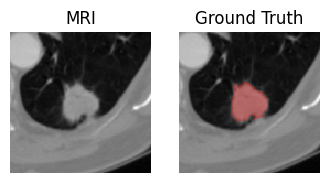

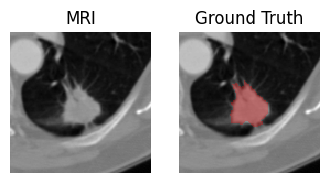

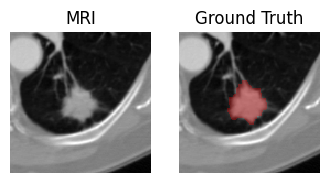

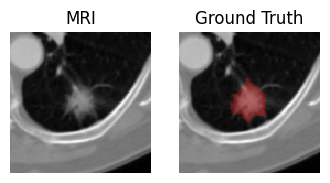

In [5]:
#from src.visualization import plot_overlay_segmentation

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

for i in range(4):
    ind=4+i
    img = dataset[ind][0].numpy()
    label = dataset[ind][1].numpy()
    f, axarr = plt.subplots(1, 2, figsize=(4,2))
    axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
    axarr[0].set_title("MRI")
    axarr[0].axis('off')

    true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
    true_color[label > 0] = (1,0,0, 0.3)

    axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
    axarr[1].imshow(true_color, interpolation='none', aspect=1)
    axarr[1].set_title("Ground Truth")
    axarr[1].axis('off')


In [ ]:
ind = 10
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
#series_uid = dataset[ind][2]
print("Dimensions of label: ", label.shape)
#print("series_uid: ", series_uid)
#print("type series_uid: ", type(series_uid))
f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[0].set_title("MRI")
axarr[0].axis('off')
true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
true_color[label > 0] = (1,0,0, 0.3)
axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[1].imshow(true_color, interpolation='none', aspect=1)
axarr[1].set_title("Ground Truth")
axarr[1].axis('off')

In [ ]:
ind = 6
img = dataset[ind][0].numpy()
label = dataset[ind][1].numpy()
#series_uid = dataset[ind][2]
print("Dimensions of label: ", label.shape)
#print("series_uid: ", series_uid)
#print("type series_uid: ", type(series_uid))
f, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[0].set_title("MRI")
axarr[0].axis('off')
true_color = np.zeros((label.shape[0], label.shape[1], 4), dtype='float32')
true_color[label > 0] = (1,0,0, 0.3)
axarr[1].imshow(img[0, :, :], 'gray', interpolation='none', aspect=1)
axarr[1].imshow(true_color, interpolation='none', aspect=1)
axarr[1].set_title("Ground Truth")
axarr[1].axis('off')

In [ ]:
img_ref = dataset[0][0].numpy()
img = dataset[0][0].numpy()


diff = abs(img_ref-img)

f, axarr = plt.subplots(1, 1, figsize=(10,5))
axarr.imshow(diff[0, :, :], 'gray', interpolation='none', aspect=1)
axarr.set_title("Diff")
axarr.axis('off')


In [ ]:
img_ref = dataset[0][0].numpy()
for i in range(dataset_size):
    img = dataset[i][0].numpy()
    diff = abs(img_ref-img)
    val = diff.sum()
    if (val == 0):
        print(i)

In [ ]:
type(dataset[0][0])

In [ ]:
indices = list(range(dataset_size))
split = int(np.floor(0.1 * dataset_size))
np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)